In [332]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from pprint import pprint
import math

In [333]:
def zscore_normalize_features(X):
    mu = np.nanmean(X, axis=0)
    sigma = np.nanstd(X)
    X_norm = (X - mu) / sigma 
    return (X_norm)

In [334]:
#importing data
Housing_data = pd.read_csv("DataSet/Housing_price.csv")
Housing_data_cleaned = Housing_data.dropna()
X_train = Housing_data_cleaned.iloc[:,2:-2]
Y_train = Housing_data_cleaned["median_house_value"]
titles = X_train.columns.tolist()

#To Numpy 
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

# Data normalization
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_norm = scaler_X.fit_transform(X_train)
Y_norm = scaler_Y.fit_transform(Y_train.reshape(-1,1)).flatten()

# X_norm = zscore_normalize_features(X_train)
# Y_norm = zscore_normalize_features(Y_train)


print("X_norm NaNs:", np.isnan(X_norm).sum())
print("Y_norm NaNs:", np.isnan(Y_norm).sum())

X_norm NaNs: 0
Y_norm NaNs: 0


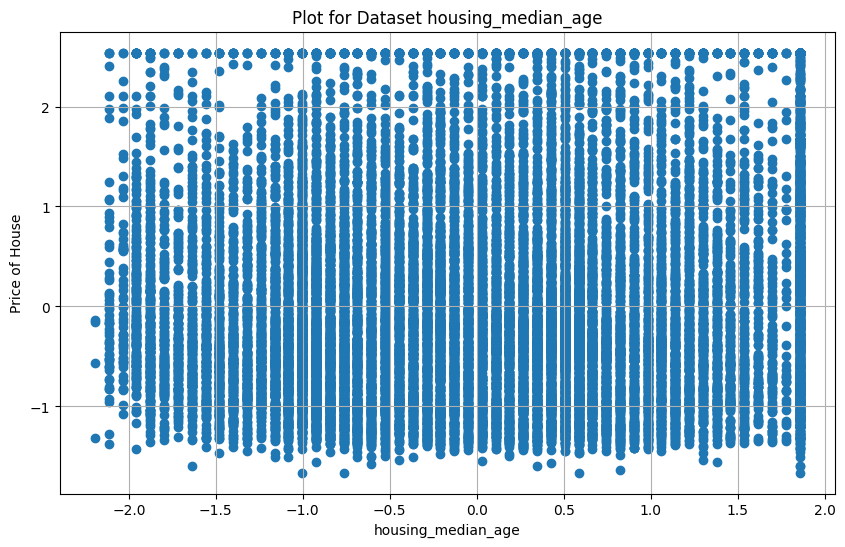

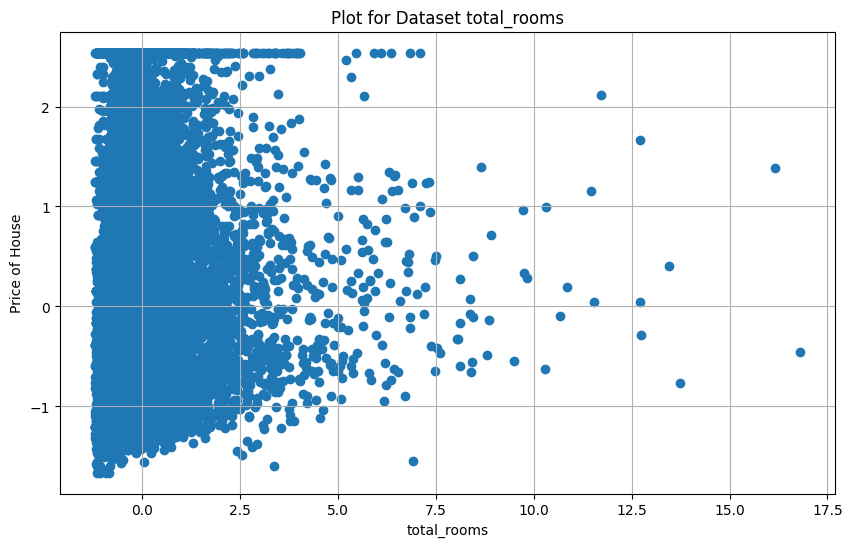

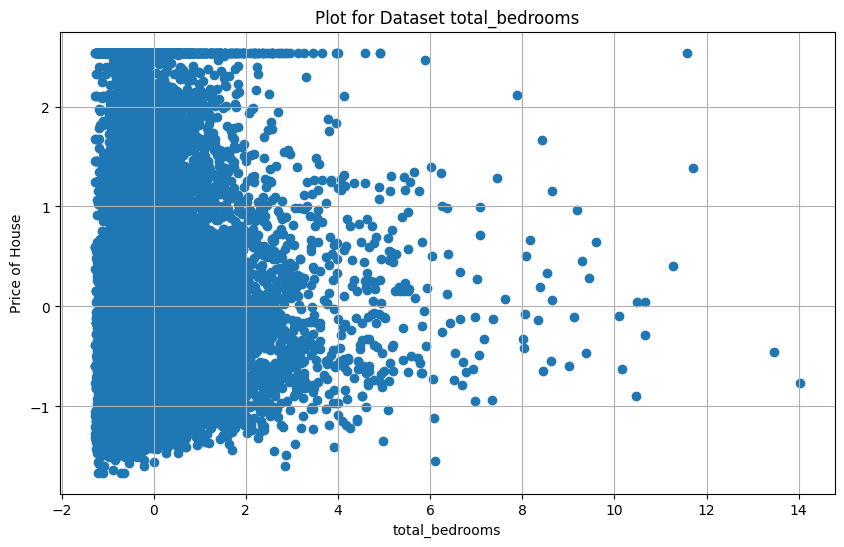

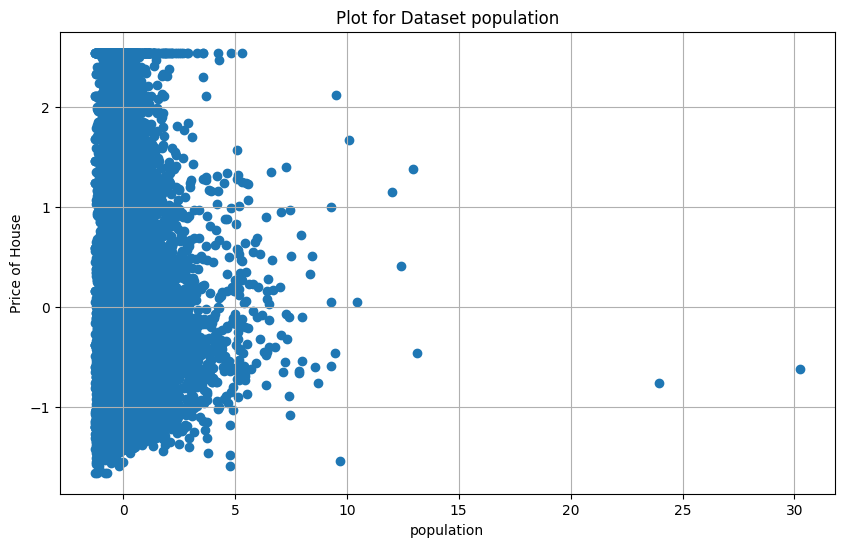

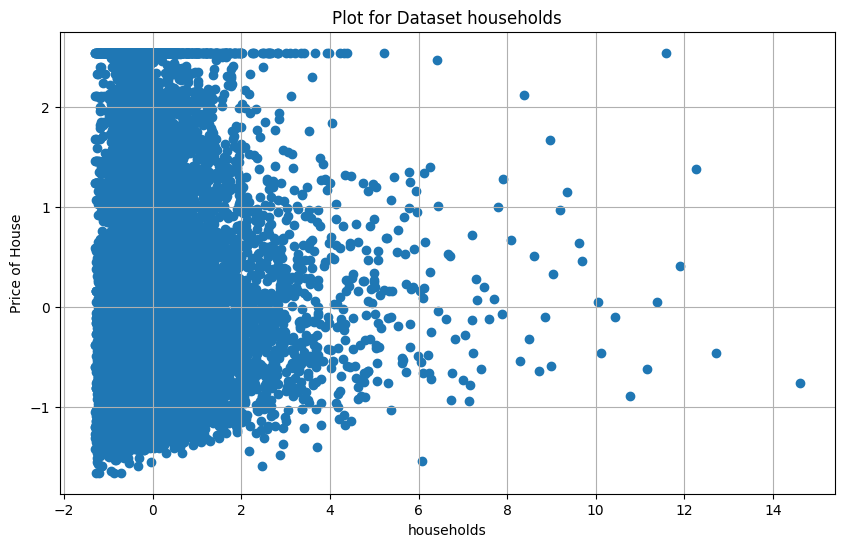

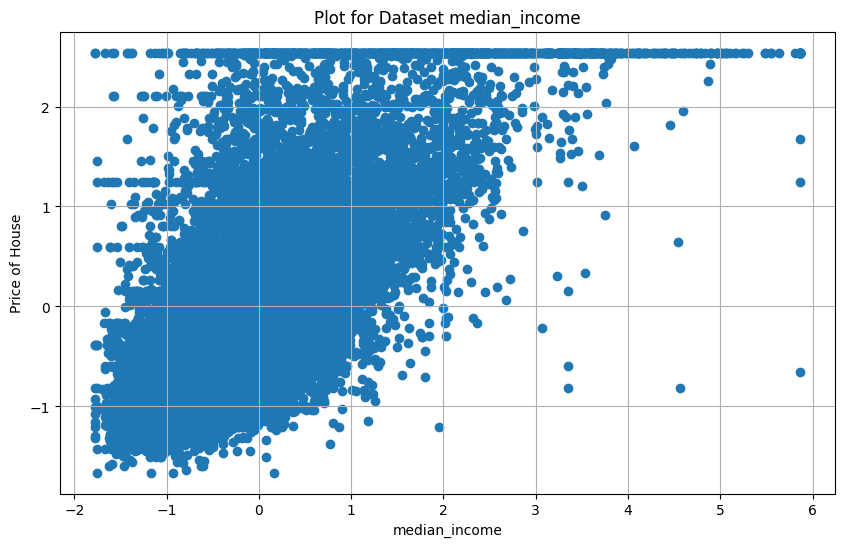

In [335]:
n = X_train.shape[1]

for i in range(0,n):
    plt.figure(figsize=(10,6))
    plt.scatter(X_norm[:,i], Y_norm)
    plt.title(f'Plot for Dataset {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Price of House')
    plt.grid()
    plt.show()
    
    

In [336]:
print(f"X Shape: {X_train.shape}, X Type: {type(X_train)}")
print(f"Y Shape: {Y_train.shape}, X Type: {type(Y_train)}")

X Shape: (20433, 6), X Type: <class 'numpy.ndarray'>
Y Shape: (20433,), X Type: <class 'numpy.ndarray'>


In [337]:
def predict(x, w, b):
    p = np.dot(x,w) + b 
    return p

In [338]:
m = X_train.shape[1]
init_w = np.random.rand(m) * 0.001
init_b = np.random.rand()

In [339]:
print(predict(X_norm, init_w, init_b))
print(X_norm)

# print("NaN in x_train:", np.isnan(X_train).any())
# print("NaN in x_norm:", np.isnan(X_norm).any())
# x_train = X_train[~np.isnan(X_train).any(axis=1)]
# print(x_train)

pprint(X_train)

[0.29756747 0.3002047  0.29781719 ... 0.29749104 0.29727147 0.297854  ]
[[ 0.98216331 -0.8038126  -0.97032521 -0.97331952 -0.97683327  2.34516291]
 [-0.60621017  2.0421302   1.34827594  0.86133924  1.67037262  2.33263161]
 [ 1.85576873 -0.53518928 -0.82556097 -0.81976943 -0.84342665  1.78293943]
 ...
 [-0.92388486 -0.17504183 -0.12547157 -0.36882637 -0.17377773 -1.14317103]
 [-0.84446619 -0.35534437 -0.30583358 -0.60356386 -0.39350628 -1.05513604]
 [-1.00330353  0.06795473  0.18541559 -0.03348711  0.07995643 -0.78060586]]
array([[4.1000e+01, 8.8000e+02, 1.2900e+02, 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [2.1000e+01, 7.0990e+03, 1.1060e+03, 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [5.2000e+01, 1.4670e+03, 1.9000e+02, 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       ...,
       [1.7000e+01, 2.2540e+03, 4.8500e+02, 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [1.8000e+01, 1.8600e+03, 4.0900e+02, 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [1.6000e

In [340]:
def compute_cost(X, y, w, b):
    
    m = X.shape[0]
    total_cost = 0.0
    cost_history = []

    # if m == 0:
    #     raise ValueError("The number of training examples is zero.")
        
    # if np.isnan(X).any() or np.isnan(y).any() or np.isnan(w).any() or np.isnan(b):
    #     raise ValueError("Input contains NaN values.")
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        total_cost += ((f_wb_i - y[i])**2)
        cost_history.append(total_cost)

    total_cost /= (2 * m)
    return total_cost
        
    

In [341]:
cost = compute_cost(X_norm, Y_norm, init_w, init_b)
print(cost)

0.5442248627423607


In [342]:
def gradient_func(X, Y, w, b):

    m, n = X.shape
    total_dj_dw = np.zeros(n)
    total_dj_db = 0
    
    for i in range(m):
        fwb = predict(X[i], w, b)
        error = fwb - Y[i]
        dJ_dw = error * X[i]
        dJ_db = error

        total_dj_dw += dJ_dw
        total_dj_db += dJ_db

    return total_dj_dw / m, total_dj_db / m 
    

In [343]:
print(gradient_func(X_norm, Y_norm, init_w, init_b))

(array([-0.1066157 , -0.13225486, -0.04861981,  0.02630971, -0.06380357,
       -0.68817836]), 0.29809637575289905)


In [344]:
def compute_gradient_descent(X, Y, w, b, alpha, iterations):
    m, n = X.shape

    cost_history = []
    for i in range(iterations):
        dj_dw, dj_db = gradient_func(X, Y, w, b)
        
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = compute_cost(X, Y, w, b)
            cost_history.append(cost)

        if i% math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {cost}   ")

    return w, b, cost_history

In [345]:
m, n = X_norm.shape
init_w = np.random.rand(n)
init_b = np.random.rand()
alpha = 1e-2
iterations = 10000
w, b, costs = compute_gradient_descent(X_norm, Y_norm, init_w, init_b, alpha, iterations)


Iteration    0: Cost 2.0497291399298403   
Iteration 1000: Cost 0.22489143997154276   
Iteration 2000: Cost 0.21888306424673876   
Iteration 3000: Cost 0.21726075824869082   
Iteration 4000: Cost 0.21681812831788808   
Iteration 5000: Cost 0.21669408590609057   
Iteration 6000: Cost 0.21665695070974017   
Iteration 7000: Cost 0.216644155384681   
Iteration 8000: Cost 0.21663863606561187   
Iteration 9000: Cost 0.216635616653286   


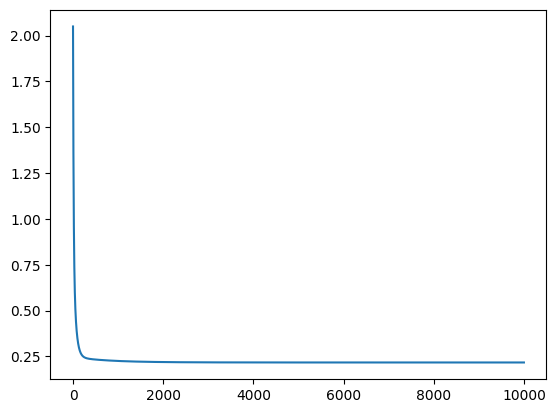

In [346]:
plt.plot(costs)
plt.show()

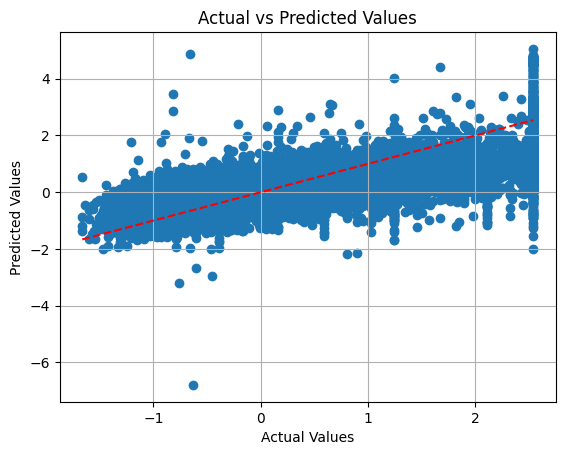

In [347]:
Y_pred = predict(X_norm, w, b)

plt.scatter(Y_norm, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([Y_norm.min(), Y_norm.max()], [Y_norm.min(), Y_norm.max()], 'r--')  # Diagonal line
plt.grid()
plt.show()

In [348]:
def check_prediction_accuracy(X, Y, w, b, threshold=0.1):
    """
    Checks the percentage of predictions that are within a certain threshold of the actual values.
    
    Parameters:
    - X: Input features (numpy array)
    - Y: Actual output values (numpy array)
    - w: Weights of the model (numpy array)
    - b: Bias of the model (float)
    - threshold: Percentage threshold for accuracy (default is 10% or 0.1)
    
    Returns:
    - accuracy_percentage: Percentage of predictions within the threshold
    """
    # Predict using the model
    predictions = predict(X, w, b)
    
    # Calculate the absolute differences
    differences = np.abs(predictions - Y)
    
    # Determine the threshold value
    threshold_value = threshold * np.abs(Y)
    
    # Count the number of predictions within the threshold
    within_threshold = np.sum(differences <= threshold_value)
    
    # Calculate the accuracy percentage
    accuracy_percentage = (within_threshold / len(Y)) * 100
    
    return accuracy_percentage

# Example usage:
accuracy = check_prediction_accuracy(X_norm, Y_norm, w, b, threshold=0.1)  # 10% threshold
print(f"Percentage of predictions within the threshold: {accuracy:.2f}%")


Percentage of predictions within the threshold: 7.78%


In [349]:
# # Adjusting contour plot for multiple features
# def plot_cost_contour(X, Y, w_range, b_range):
#     # Create a grid for weights
#     W = np.linspace(w_range[0], w_range[1], 100)
#     W1, W2 = np.meshgrid(W, W)
    
#     # Initialize costs array
#     costs = np.zeros(W1.shape)

#     for i in range(W1.shape[0]):
#         for j in range(W1.shape[1]):
#             # Create a weight vector with six weights and fix the rest to zero
#             weights = np.zeros(X.shape[1])
#             weights[0] = W1[i, j]
#             weights[1] = W2[i, j]
#             costs[i, j] = compute_cost(X, Y, weights, 0)  # Using a fixed bias of 0

#     plt.figure(figsize=(10, 6))
#     contour = plt.contourf(W1, W2, costs, levels=50, cmap='viridis')
#     plt.colorbar(contour)
#     plt.title('Contour Plot of Cost Function')
#     plt.xlabel('Weight 1 (w1)')
#     plt.ylabel('Weight 2 (w2)')
#     plt.scatter(init_w[0], init_b, color='red')  # Initial point
#     plt.scatter(w[0], b, color='blue')  # Optimal point after training
#     plt.show()

# # Adjusting 3D surface plot for multiple features
# def plot_cost_surface(X, Y, w_range, b_range):
#     W1 = np.linspace(w_range[0], w_range[1], 100)
#     W2 = np.linspace(w_range[0], w_range[1], 100)
#     W1, W2 = np.meshgrid(W1, W2)

#     costs = np.zeros(W1.shape)

#     for i in range(W1.shape[0]):
#         for j in range(W1.shape[1]):
#             # Create a weight vector with six weights and fix the rest to zero
#             weights = np.zeros(X.shape[1])
#             weights[0] = W1[i, j]
#             weights[1] = W2[i, j]
#             costs[i, j] = compute_cost(X, Y, weights, 0)  # Using a fixed bias of 0

#     fig = plt.figure(figsize=(10, 6))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(W1, W2, costs, cmap='viridis', alpha=0.8)
#     ax.set_title('3D Surface Plot of Cost Function')
#     ax.set_xlabel('Weight 1 (w1)')
#     ax.set_ylabel('Weight 2 (w2)')
#     ax.set_zlabel('Cost')
#     plt.show()

# # Plotting contour graph
# plot_cost_contour(X_norm, Y_norm, w_range=(-2, 2), b_range=(-2, 2))

# # Plotting 3D surface graph
# plot_cost_surface(X_norm, Y_norm, w_range=(-2, 2), b_range=(-2, 2))


KeyboardInterrupt: 

In [364]:
def predict_from_user_input(scaler_X, model_weights, model_bias, titles):
    # Get user input for each feature
    user_input = []

    print("Please enter the following values:")
    for feature in titles:
        value = float(input(f"{feature}: "))
        user_input.append(value)
    
    # Convert to numpy array and reshape
    user_input_array = np.array(user_input).reshape(1, -1)
    
    # Normalize the input using the fitted scaler
    user_input_normalized = scaler_X.transform(user_input_array)

    # Make the prediction
    prediction_normalized = predict(user_input_normalized, model_weights, model_bias)
    
    # Denormalize the prediction if necessary
    prediction_denormalized = scaler_Y.inverse_transform(prediction_normalized.reshape(-1, 1)).flatten()
    
    print(f"The predicted value is: {prediction_denormalized[0]}")

# Example usage:
# predict_from_user_input(scaler_X, w, b)


In [365]:
predict_from_user_input(scaler_X, w, b, titles)

Please enter the following values:


housing_median_age:  52
total_rooms:  1627
total_bedrooms:  280
population:  565
households:  259
median_income:  3.8462


ValueError: X has 6 features, but StandardScaler is expecting 1 features as input.

In [ ]:
52	1627	280	565	259	3.8462